In [1]:
# Import necessary packages
import os 
import folium
from folium import plugins
import earthpy as et
import earthpy.spatial as es
import pandas as pd
import numpy as np
from math import log10

In [2]:
data = pd.read_csv('./owid-co2-data.csv')
data

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001733e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25984,ZWE,Zimbabwe,2016,10.738,0.765,1.415,0.639,0.046,6.959,0.496,...,2.076,11.50,0.820,6.21,0.443,14030338.0,2.096179e+10,46.666,3326.073,2.226
25985,ZWE,Zimbabwe,2017,9.582,0.673,1.666,0.678,0.048,5.665,0.398,...,2.023,11.62,0.816,6.35,0.446,14236599.0,2.194784e+10,45.936,3226.617,2.093
25986,ZWE,Zimbabwe,2018,11.854,0.821,1.308,0.697,0.048,7.101,0.492,...,2.173,11.96,0.828,6.59,0.456,14438812.0,2.271535e+10,47.502,3289.887,2.091
25987,ZWE,Zimbabwe,2019,10.949,0.748,1.473,0.697,0.048,6.020,0.411,...,NaN,NaN,NaN,NaN,NaN,14645473.0,NaN,49.427,3374.877,NaN


In [3]:
data_location = pd.read_csv('country_location.csv')
data_location

,ISO 3166 Country Code,Country,Latitude,Longitude
0,AD,Andorra,42.50,1.50
1,AE,United Arab Emirates,24.00,54.00
2,AF,Afghanistan,33.00,65.00
3,AG,Antigua and Barbuda,17.05,-61.80
4,AI,Anguilla,18.25,-63.17
...,...,...,...,...
235,YE,Yemen,15.00,48.00
236,YT,Mayotte,-12.83,45.17
237,ZA,South Africa,-29.00,24.00
238,ZM,Zambia,-15.00,30.00


In [4]:
from tqdm.notebook import tqdm, trange
latitude = []
long = []
for i in tqdm(data["country"]):
    try:
        idx = pd.Index(data_location['Country']).get_loc(i)
        latitude.append(data_location['Latitude'][idx]) #, location.longitude)
        long.append(data_location['Longitude'][idx])
    except:
        latitude.append(float("Nan"))#, location.longitude)
        long.append(float("Nan"))

  0%|          | 0/25989 [00:00<?, ?it/s]

In [5]:
data['longitude']=long
data['latitude']=latitude
data_new = data[data['latitude'].notna()]
#data = data[np.logical_not(np.isnan(data['co2'])) or data['co2'].notna()].reset_index()

In [6]:
def pointMap(year, attribute):
    attribute = 'co2'
    data_year = data_new[data_new['year']==year].reset_index()
    data_year = data_year[data_year[attribute].notna()].reset_index()
    m = folium.Map(location=[0, 0], 
               zoom_start=2.5,
               tiles = 'Stamen Terrain')

    for i in range(len(data_year)):
        folium.CircleMarker(
            location=[data_year['latitude'][i], data_year['longitude'][i]],
            radius=4*log10(data_year[attribute][i]+10),
            #popup=str(data_2000['co2'][i]),
            popup=data_year['country'][i]+" "+str(data_year[attribute][i]),
            color="#3186cc",
            fill=True,
            fill_color="#3186cc",
        ).add_to(m)
        
    display(m)   


def heatMap(year, attribute):
    data_year = data_new[data_new['year']==year].reset_index()
    data_year = data_year[data_year[attribute].notna()].reset_index()
    m = folium.Map(location=[0, 0], 
                zoom_start=2.5,
                tiles = 'Stamen Terrain')
    heat_data = data_year[['latitude','longitude',attribute]]
    heat_data
    hm = plugins.HeatMap(heat_data,auto_play=True,max_opacity=1)
    hm.add_to(m)
    display(m) 

In [7]:
from ipywidgets import interact, interactive, fixed, interact_manual
x = [i for i in range(1980,2020)]
list_attributes=list(data.columns[3:-2])
interact(pointMap, year=x, attribute=list_attributes)

interactive(children=(Dropdown(description='year', options=(1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 19…

<function __main__.pointMap(year, attribute)>

In [8]:
interact(heatMap, year=x, attribute=list_attributes)

interactive(children=(Dropdown(description='year', options=(1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 19…

<function __main__.heatMap(year, attribute)>

In [9]:
interact(heatMap, year=(1980,2020,2), attribute=list_attributes)

interactive(children=(IntSlider(value=2000, description='year', max=2020, min=1980, step=2), Dropdown(descript…

<function __main__.heatMap(year, attribute)>

In [16]:
data_pred=pd.read_csv('co2_predictions.csv')
latitude = []
long = []
for i in tqdm(data_pred["country"]):
    try:
        idx = pd.Index(data_location['Country']).get_loc(i)
        latitude.append(data_location['Latitude'][idx]) #, location.longitude)
        long.append(data_location['Longitude'][idx])
    except:
        latitude.append(float("Nan"))#, location.longitude)
        long.append(float("Nan"))
data_pred['longitude']=long
data_pred['latitude']=latitude
data_pred = data_pred[data_pred['latitude'].notna()]

  0%|          | 0/2480 [00:00<?, ?it/s]

In [17]:
def heatMapPred(year, attribute):
    data_year = data_pred[data_pred['year']==year]
    data_year = data_year[data_year[attribute].notna()].reset_index()
    m = folium.Map(location=[0, 0], 
                zoom_start=2.5,
                tiles = 'Stamen Terrain')
    heat_data = data_year[['latitude','longitude',attribute]]
    heat_data
    hm = plugins.HeatMap(heat_data,auto_play=True,max_opacity=1)
    hm.add_to(m)
    display(m)

In [12]:
interact(heatMapPred, year=(2020,2030,1), attribute='co2')

interactive(children=(IntSlider(value=2025, description='year', max=2030, min=2020), Text(value='co2', descrip…

<function __main__.heatMapPred(year, attribute)>

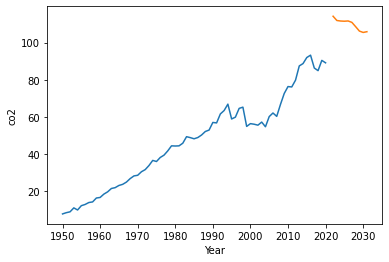

In [13]:
import matplotlib.pyplot as plt

countries = data_new['country'].drop_duplicates()
countries

country = 'Colombia'
dat_country = data_new[data_new['country']==country]
dat_country = dat_country[dat_country['year']>=1950]
dat_country_pred = data_pred[data_pred['country']==country]
dat_country_pred
plt.plot(dat_country['year'],dat_country['co2'])
plt.xlabel('Year')
plt.ylabel('co2')
plt.plot(dat_country_pred['year'],dat_country_pred['co2'])
plt.show()

In [14]:
countries = data_new['country'].drop_duplicates()
countries
def plotPred(country):
    dat_country = data_new[data_new['country']==country]
    dat_country = dat_country[dat_country['year']>=1950]
    dat_country_pred = data_pred[data_pred['country']==country]
    dat_country_pred
    plt.plot(dat_country['year'],dat_country['co2'],linewidth=2)
    plt.xlabel('Year')
    plt.ylabel('co2')
    plt.plot(dat_country_pred['year'],dat_country_pred['co2'],linewidth=2)
    plt.legend(['Observed values','Predicted values'])
    plt.show()

In [15]:
plt.rcParams['figure.figsize'] = [12, 5]
interact(plotPred, country=countries)

interactive(children=(Dropdown(description='country', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra',…

<function __main__.plotPred(country)>